In [1]:
# Import all libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
# Read the train and test datasets
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
# Quick summary of the train dataset
train['group']='train'
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,1
top,NaN,NaN,NaN,"Rugg, Miss. Emily",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S,train
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,891
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [4]:
# Quick summary of the test dataset
test['group']='test'
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,1
top,NaN,NaN,"Kennedy, Mr. John",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,test
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,418
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [5]:
# convert some data types
train.info()
train[['PassengerId','Survived','Pclass']] = train[['PassengerId','Survived','Pclass']].astype('object')
test[['PassengerId','Pclass']] = test[['PassengerId','Pclass']].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
group          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [6]:
# Merge the train and test datasets together
combined = pd.concat([train,test])
combined.columns = combined.columns.str.lower()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
# Handling missing values
combined.isnull().sum()

age             263
cabin          1014
embarked          2
fare              1
name              0
parch             0
passengerid       0
pclass            0
sex               0
sibsp             0
survived        418
ticket            0
group             0
dtype: int64

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


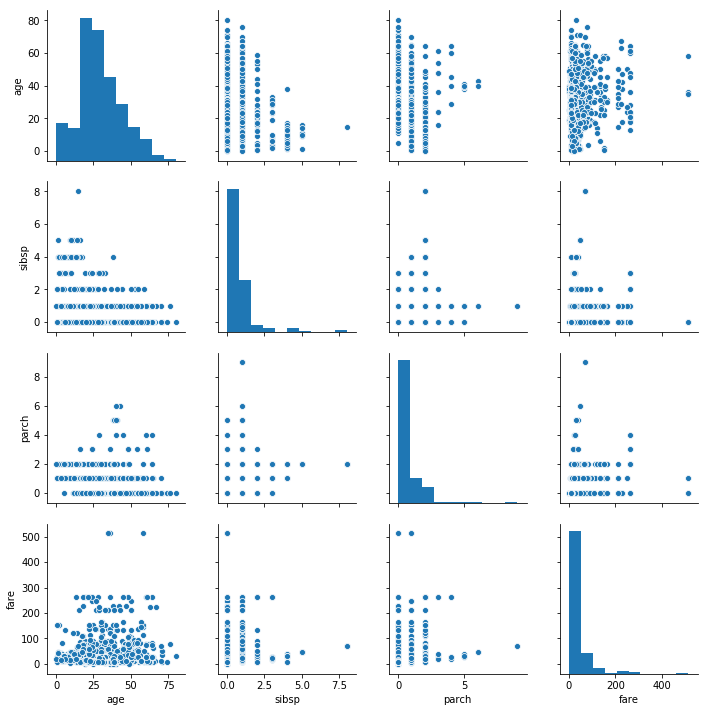

In [8]:
# Before we start to handle missing data we need to have a feel of the dataset
# Exploratory data analysis
sns.pairplot(combined[['age','sibsp','parch','fare']])

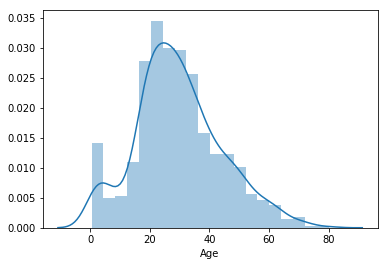

In [9]:
sns.distplot(train[train.Age.notnull()].Age)

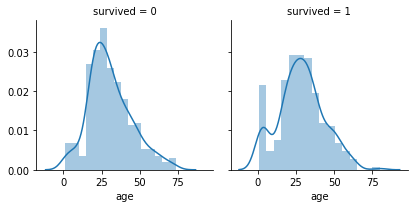

In [10]:
# Survived versus age
g = sns.FacetGrid(combined,col= 'survived')
g.map(sns.distplot,'age')

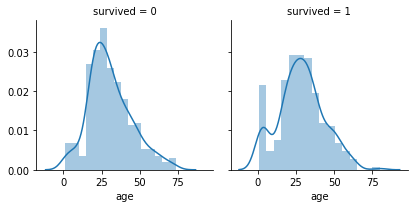

In [11]:
age_data = combined[combined.age.notnull()]
g = sns.FacetGrid(age_data,col='survived')
g.map(sns.distplot,'age')

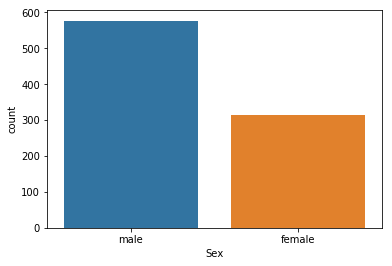

In [12]:
sns.countplot(x='Sex',data=train)

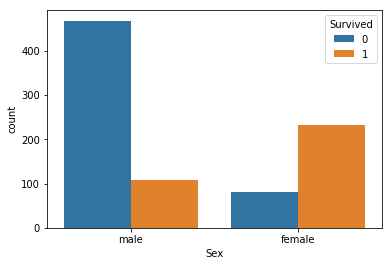

In [13]:
sns.countplot(x='Sex',hue = 'Survived',data=train)

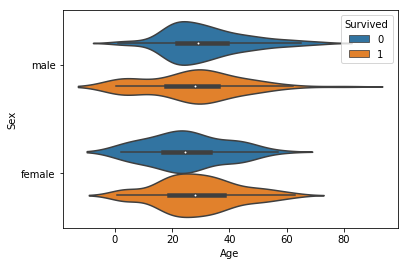

In [14]:
sns.violinplot(x='Age',y='Sex',hue='Survived', data=train)

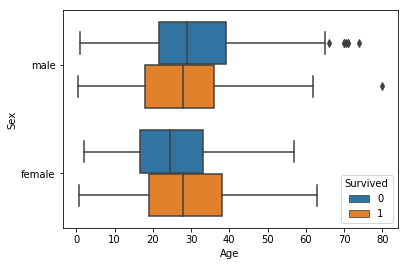

In [15]:
sns.boxplot(x='Age',y='Sex',hue='Survived', data=train)

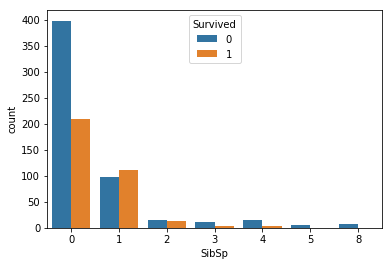

In [16]:
sns.countplot(x='SibSp',hue='Survived',data=train)

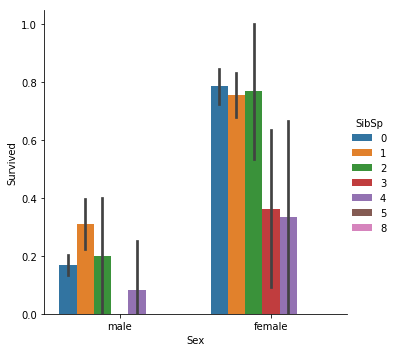

In [17]:
sns.catplot(x="Sex", y="Survived", hue="SibSp", kind="bar", data=train);

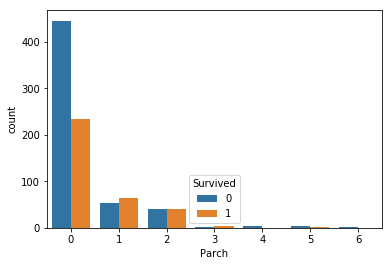

In [18]:
sns.countplot(x='Parch',hue='Survived',data=train)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


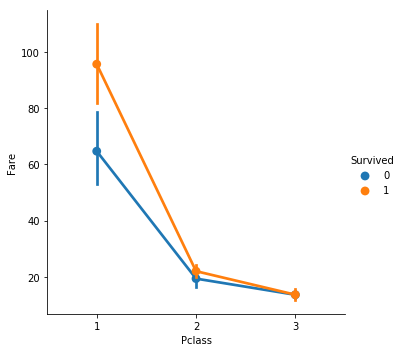

In [19]:
 sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=train)

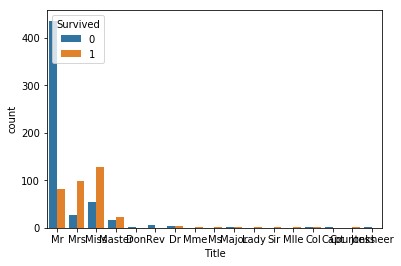

In [20]:
#Feature engineering
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
sns.countplot(x='Title',hue='Survived',data=train)